# Graph Mining Basics

In [1]:
#!pip install networkx --upgrade

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman

## Create Graph

In [3]:
g = nx.Graph()
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(1, 5)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(4, 5)

In [4]:
g = nx.Graph()
g.add_edges_from([(1,2), (1,3), (1,5), (2,3), (3,4), (4,5)])

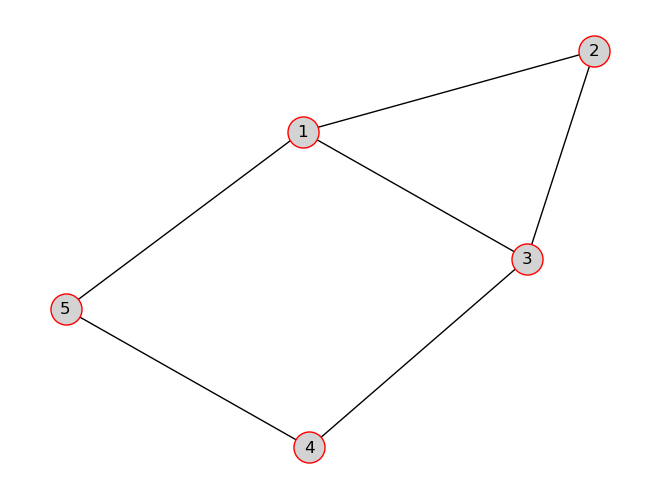

In [5]:
nx.draw(g, with_labels=True, node_size=500,edgecolors='red', node_color='lightgray')

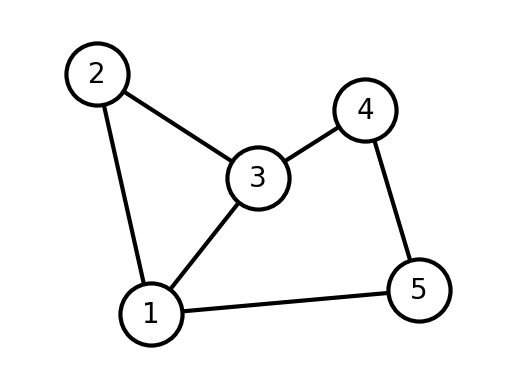

In [6]:
# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}# network visualization options
options = {
    "font_size": 20,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
}

# draw network
nx.draw_networkx(g, pos, **options)

# plot setting and show
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [7]:
#degree of all the nodes in the graph
g.degree()

DegreeView({1: 3, 2: 2, 3: 3, 5: 2, 4: 2})

In [8]:
A = nx.adjacency_matrix(g)
print(A.todense())

[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]


## Graph Algorithms

In [9]:
#In graph theory, a graph is considered connected if there is a path between every pair of vertices in the graph
nx.is_connected(g)

True

In [10]:
#Is there a path between two nodes
nx.has_path(g, 1, 5)

True

In [11]:
nx.has_path(g, 2, 5)

True

In [12]:
#Shortest path between nodes
nx.shortest_path(g, 1, 5)

[1, 5]

In [13]:
nx.shortest_path(g, 2, 5)

[2, 1, 5]

In [14]:
#number of nodes in the graph
g.number_of_nodes()

5

### Centrality

Centrality measures the importance or prominence of nodes within a network. It quantifies the relative influence, significance, or centrality of nodes based on their position and connectivity within the network.

#### Degree Centrality

We can calculate the degree centrality of each node using the degree_centrality function:

In [15]:
degree_centrality = nx.degree_centrality(g)
print(degree_centrality)

{1: 0.75, 2: 0.5, 3: 0.75, 5: 0.5, 4: 0.5}


Output a list of communities in the graph based on the Girvan–Newman algorithm.

In [16]:
communities = girvan_newman(g)
print(list(next(communities)))

[{1, 2, 3}, {4, 5}]


#### Betweenness Centrality

The betweenness centrality of a node measures the number of shortest paths that pass through that node. 

In [17]:
betweenness_centrality = nx.betweenness_centrality(g)
print(betweenness_centrality)

{1: 0.25, 2: 0.0, 3: 0.25, 5: 0.08333333333333333, 4: 0.08333333333333333}


#### Connected Components

A connected component is a subgraph in which every node is reachable from every other node. We can find the connected components of a graph using the connected_components function:

In [18]:
connected_components = nx.connected_components(g)
print(list(connected_components))

[{1, 2, 3, 4, 5}]


#### PageRank 

PageRank is an algorithm used by Google to rank web pages in their search engine results. It measures the importance of a node based on the number and quality of incoming links. We can calculate the PageRank of each node in the graph using the pagerank function:

In [19]:
pagerank = nx.pagerank(g)
print(pagerank)

{1: 0.24369622576678, 2: 0.16809495422526696, 3: 0.24369622576678, 5: 0.1722562971205864, 4: 0.1722562971205864}


#### HITS  

Computes two numbers for a node. 
- Authorities estimates the node value based on the incoming links. 
- Hubs estimates the node value based on outgoing links.

In [20]:
h, a = nx.hits(g)
print(h,a)

{1: 0.2405971520460079, 2: 0.19393656647463045, 3: 0.24059715204600776, 5: 0.16243456471667692, 4: 0.16243456471667703} {1: 0.24059715204600773, 2: 0.1939365664746305, 3: 0.24059715204600787, 5: 0.16243456471667703, 4: 0.1624345647166769}


#### Clustering Coefficient 

Clustering coefficient of a node measures the density of connections among its neighbors. We can calculate the clustering coefficient of each node in the graph using the clustering function:

In [21]:
clustering_coefficient = nx.clustering(g)
print(clustering_coefficient)


{1: 0.3333333333333333, 2: 1.0, 3: 0.3333333333333333, 5: 0, 4: 0}


#### Eigenvector Centrality

Eigenvector centrality is a measure of a node's influence in a network, taking into account both the number and quality of its connections. We can calculate the eigenvector centrality of each node in the graph using the eigenvector_centrality function:

In [22]:
eigenvector_centrality = nx.eigenvector_centrality(g)
print(eigenvector_centrality)

{1: 0.5298988890761731, 2: 0.4271316779596084, 3: 0.5298988890761731, 5: 0.35775191431708964, 4: 0.35775191431708964}


#### Diameter: 

The diameter of a graph is the longest shortest path between any two nodes in the graph. We can calculate the diameter of the graph using the diameter function:

In [23]:
diameter = nx.diameter(g)
print(diameter)

2


Closeness Centrality: The closeness centrality of a node measures the average distance from that node to all other nodes in the graph. We can calculate the closeness centrality of each node in the graph using the closeness_centrality function:

In [24]:
closeness_centrality = nx.closeness_centrality(g)
print(closeness_centrality)

{1: 0.8, 2: 0.6666666666666666, 3: 0.8, 5: 0.6666666666666666, 4: 0.6666666666666666}


#### Degree Distribution: 

The degree distribution of a graph is the probability distribution of the degrees of the nodes in the graph. We can plot the degree distribution of the graph using the degree_histogram function:

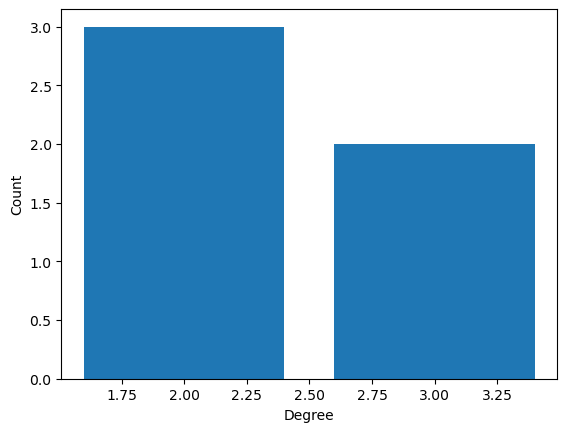

In [25]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
degree_counts = {}
for degree in degree_sequence:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1
x, y = zip(*degree_counts.items())

plt.bar(x, y)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

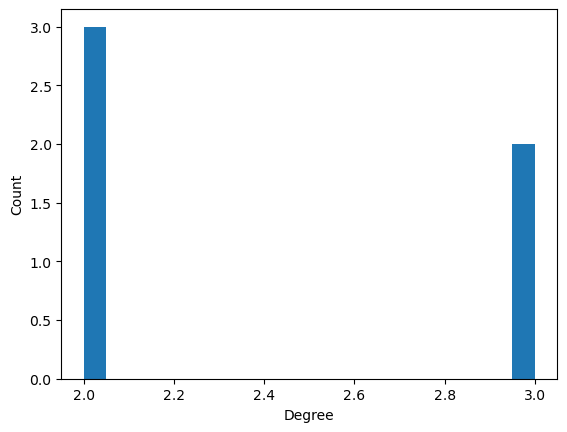

In [26]:
# Create a graph with 1000 nodes and 500 edges
G = nx.gnm_random_graph(100, 500)

# Calculate the degree of each node and store it in a list
degrees = [g.degree(n) for n in g.nodes()]

# Plot a histogram of the degree distribution
plt.hist(degrees, bins=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()